In [1]:
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import MaxNLocator
import pandas as pd
import numpy as np
import yaml

In [2]:
NO3NO2_xlxs='/Users/rmueller/Projects/PugetSound_NutrientSourceReduction/OneDrive - UW/Documents/Nutrient Science/9. Modeling/9.Preprocessing_SSMC/3.point_nonpoint_info_scenarios/NO3NO2_load_timeseries.xlsx'
NH4_xlxs='/Users/rmueller/Projects/PugetSound_NutrientSourceReduction/OneDrive - UW/Documents/Nutrient Science/9. Modeling/9.Preprocessing_SSMC/3.point_nonpoint_info_scenarios/NH4_load_timeseries.xlsx'
# tabs are organized by run, e.g. "ssm_pnt_wq_2a"
# columns are organized by name of river or WWTP

# The following WWTP names are from the "Table NLoading1" tab of 
# https://uwnetid.sharepoint.com/:x:/r/sites/og_uwt_psi/_layouts/15/Doc.aspx?sourcedoc=%7B3788B09C-126F-40BF-86AF-22DEC185E831%7D&file=SOG_NB_Figures%26Tables.xlsx&action=default&mobileredirect=true

# The two spaces in front of names reflects formatting of column names in 
# excel spreadsheet
WWTP_names = [
  "  Bellingham",
  "  Anacortes",
  "  Birch Bay",
  "  Blaine",
  "  Friday Harbor",
  "  Lummi Goose Pt",
  "  Whidbey Naval Station",
  "  Makah",
  "  Lummi Sandy Pt",
  "  Eastsound Water District",
  "  Roche Harbor",
  "  Fisherman Bay",
  "  Rosario Utilities",
  "  Larrabee State Park",
  "  Eastsound Orcas Village",
]

# Some rivers discharge into more than one node and have nutrient
# loading in two columns (namely: Nooksack and Samish Bell).
# Nutrient loading for these rivers is the sum of the columns
river_names = [
    "  Nooksack R_1", #2-columns
    "  Nooksack R_2",
    "  Whatcom_Bell north",
    "  Birch Bay R",
    "  Samish_Bell south_1", #2 columns
    "  Samish_Bell south_2",
    "  Orcas Island",
    "  San Juan Island",
    "  Lopez Island",
]

In [3]:
# load setup information
with open('../etc/SSM_config_SOG.yaml', 'r') as file:
    ssm = yaml.safe_load(file)
# rename existing and reference tags to match Su Kyong's labels
ssm['run_information']['run_tag']['SOG_NB']['wqm_baseline'] = "exist"
ssm['run_information']['run_tag']['SOG_NB']['wqm_reference'] = "ref"

In [4]:
run_tag_all =[ssm['run_information']['run_tag']['SOG_NB'][run_name] for run_name in [*ssm['run_information']['run_tag']['SOG_NB']]]
run_tag_wwtp =[ssm['run_information']['SOG_NB_WWTPs'][run_name] for run_name in [*ssm['run_information']['SOG_NB_WWTPs']]]
run_tag_rivers =[ssm['run_information']['SOG_NB_rivers'][run_name] for run_name in [*ssm['run_information']['SOG_NB_rivers']]]
print("All runs: ", run_tag_all)
print("WWTP runs: ", run_tag_wwtp)
print("River runs: ", run_tag_rivers)

All runs:  ['1b', '1c', '1d', '1e', '2a', '2b', 'exist', 'ref']
WWTP runs:  ['1b', '1d', '1e', 'exist', 'ref']
River runs:  ['2a', '2b', 'exist', 'ref']


In [5]:
run_description_all =[run_name for run_name in [*ssm['run_information']['run_tag']['SOG_NB']]]
run_description_wwtp =[run_name for run_name in [*ssm['run_information']['SOG_NB_WWTPs']]]
run_description_rivers =[run_name for run_name in [*ssm['run_information']['SOG_NB_rivers']]]

In [6]:
run_description_wwtp

['1b_all_sog_wwtp_off',
 '1d_small_sog_wwtp_off',
 '1e_med_sog_wwtp_off',
 'wqm_baseline',
 'wqm_reference']

## Plot up WWTP nutrient loading

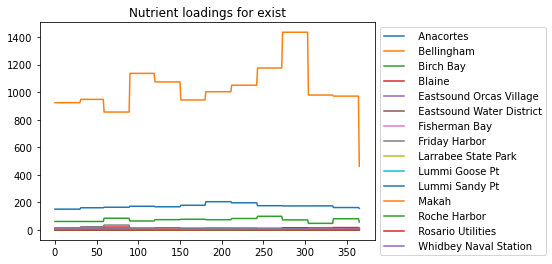

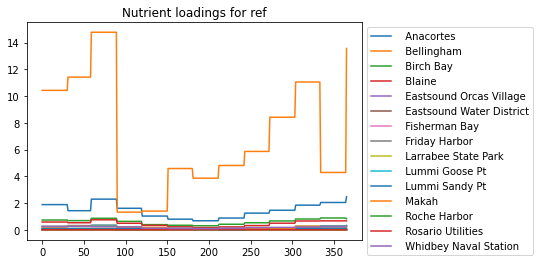

In [7]:
out_dir = "/Users/rmueller/Projects/PugetSound_NutrientSourceReduction/graphics/nutrient_loading"
wwtp_df={}
wwtpNH4_df={}
wwtpNO3NO2_df={}
for idx,run_tag in enumerate(['exist','ref']):
    # read in data
    # spreadsheets in workbook organized by names in format of, e.g., "ssm_pnt_wq_exist"
    # I use the run tags to select the desired spreadsheet
    wwtpNO3NO2_df[run_tag] = pd.read_excel(
        NO3NO2_xlxs,
        sheet_name=f'ssm_pnt_wq_{run_tag}',
        usecols=WWTP_names
    )
    wwtpNH4_df[run_tag] = pd.read_excel(
        NH4_xlxs,
        sheet_name=f'ssm_pnt_wq_{run_tag}',
        usecols=WWTP_names
    )
    wwtp_df[run_tag]=wwtpNO3NO2_df[run_tag]+wwtpNH4_df[run_tag]
    # The column names have spaces in front of the names.  
    wwtp_df[run_tag].plot()
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.title(f"Nutrient loadings for {run_tag}")
    plt.savefig(
        f'{out_dir}/ssm_pnt_wq_{run_tag}.png', 
        dpi=300,
        bbox_inches='tight'
    )

## plot existing and reference conditions

In [8]:
mpl.rc('font', size=11)
# some of the following may be repetetive but can also be set relative to the font value above 
#    (eg "xx-small, x-small,small, medium, large, x-large, xx-large, larger, or smaller"; see link above for details)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('legend', fontsize=12)
mpl.rc('axes', titlesize=16)
mpl.rc('axes', labelsize=12)
mpl.rc('figure', titlesize=16)
mpl.rc('text', usetex=False)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

In [5]:
# create a pretty x-axis. 
run_tag='exist'

# Load (un-named) time column 'Unnamed: 0'
df=pd.read_excel(
    NO3NO2_xlxs,
    sheet_name=f'ssm_pnt_wq_{run_tag}',
    usecols=[0]
)
time = df['Unnamed: 0']
ticks = [time[time==f'2014-{str(MM).zfill(2)}-15 00:00:00'].item() for MM in np.arange(1,13)]
ticklabels=[str(MM).zfill(2) for MM in np.arange(1,13)]

In [6]:
time

0     2014-01-01
1     2014-01-02
2     2014-01-03
3     2014-01-04
4     2014-01-05
         ...    
361   2014-12-28
362   2014-12-29
363   2014-12-30
364   2014-12-31
365   2015-01-01
Name: Unnamed: 0, Length: 366, dtype: datetime64[ns]

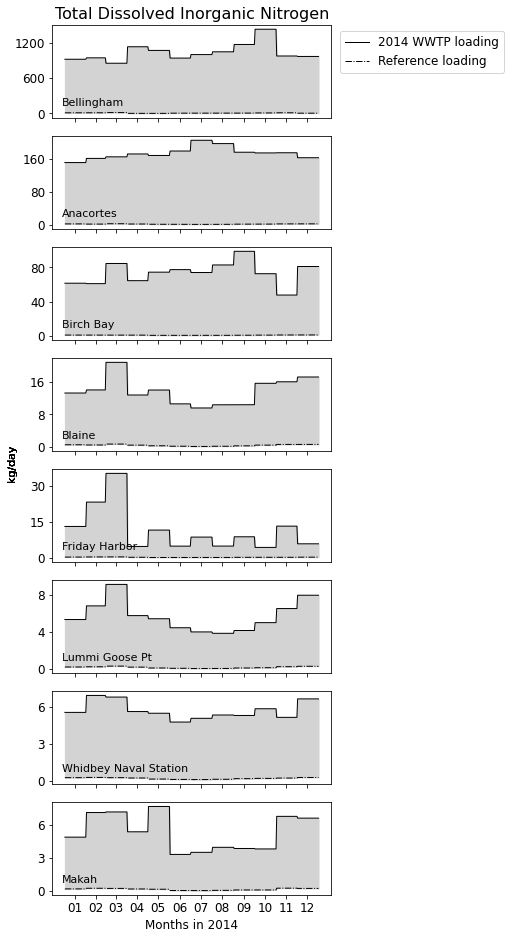

In [10]:
fig, axs = plt.subplots(8, 1,figsize = (5,2*8))
for idx,wwtp in enumerate(WWTP_names[0:8]):
    existing = wwtp_df['exist'][wwtp][0:-1]
    reference = wwtp_df['ref'][wwtp][0:-1]
    x=np.arange(len(existing))
    # plot 2014 conditions
    axs[idx].plot(time[:-1],existing,
        color = ssm['bw_line']['color']['baseline'],
        lw=ssm['bw_line']['width']['baseline'],
        ls=ssm['bw_line']['style']['baseline'],
        label='2014 WWTP loading'
    )
    # plot reference conditions
    axs[idx].plot(time[:-1], reference,
        color = ssm['bw_line']['color']['reference'],
        lw=ssm['bw_line']['width']['reference'],
        ls=ssm['bw_line']['style']['reference'],
        label='Reference loading'
    )
    # shade in region between existing and reference
    axs[idx].fill_between(time[:-1], existing, reference, color='lightgrey')
    axs[idx].yaxis.set_major_locator(MaxNLocator(3)) 
    axs[idx].xaxis.set_major_locator(MaxNLocator(14)) 
    fig.text(0.0, 0.5, 'kg/day', va='center', rotation='vertical')
    #axs[idx].set_ylabel('kg/day')
    if idx==7:
        axs[idx].set_xlabel('Months in 2014')
        axs[idx].set_xticks(ticks)
        axs[idx].set_xticklabels(ticklabels)
    else:
        axs[idx].set_xticks(ticks)
        axs[idx].set_xticklabels('')
    if idx==0:
        axs[idx].set_title('Total Dissolved Inorganic Nitrogen')
        axs[idx].legend(bbox_to_anchor=(1.01, 1.0))
    anchored_text = AnchoredText(
        wwtp[2:], 
        loc='lower left',
        frameon=False,
        prop=dict(fontweight="normal",color="black")
    )
    axs[idx].add_artist(anchored_text)   
plt.savefig(
    f'{out_dir}/WWTP_loadings_a.png', 
    dpi=300,
    bbox_inches='tight'
)
plt.show()

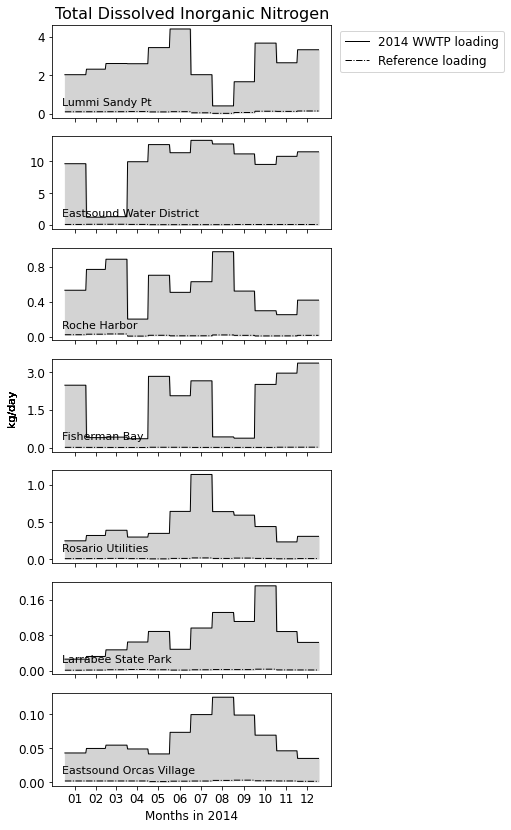

In [11]:
fig, axs = plt.subplots(7, 1,figsize = (5,2*7))
for idx,wwtp in enumerate(WWTP_names[8:]):
    existing = wwtp_df['exist'][wwtp][0:-1]
    reference = wwtp_df['ref'][wwtp][0:-1]
    x=np.arange(len(existing))
    # plot 2014 conditions
    axs[idx].plot(time[:-1],existing,
        color = ssm['bw_line']['color']['baseline'],
        lw=ssm['bw_line']['width']['baseline'],
        ls=ssm['bw_line']['style']['baseline'],
        label='2014 WWTP loading'
    )
    # plot reference conditions
    axs[idx].plot(time[:-1], reference,
        color = ssm['bw_line']['color']['reference'],
        lw=ssm['bw_line']['width']['reference'],
        ls=ssm['bw_line']['style']['reference'],
        label='Reference loading'
    )
    # shade in region between existing and reference
    axs[idx].fill_between(time[:-1], existing, reference, color='lightgrey')
    axs[idx].yaxis.set_major_locator(MaxNLocator(3)) 
    axs[idx].xaxis.set_major_locator(MaxNLocator(14)) 
    fig.text(0.0, 0.5, 'kg/day', va='center', rotation='vertical')
    #axs[idx].set_ylabel('kg/day')
    if idx==6:
        axs[idx].set_xlabel('Months in 2014')
        axs[idx].set_xticks(ticks)
        axs[idx].set_xticklabels(ticklabels)
    else:
        axs[idx].set_xticks(ticks)
        axs[idx].set_xticklabels('')
    if idx==0:
        axs[idx].set_title('Total Dissolved Inorganic Nitrogen')
        axs[idx].legend(bbox_to_anchor=(1.01, 1.0))
    anchored_text = AnchoredText(
        wwtp[2:], 
        loc='lower left',
        frameon=False,
        prop=dict(fontweight="normal",color="black")
    )
    axs[idx].add_artist(anchored_text)   
plt.savefig(
    f'{out_dir}/WWTP_loadings_b.png', 
    dpi=300,
    bbox_inches='tight'
)
plt.show()

## Plot up river loadings

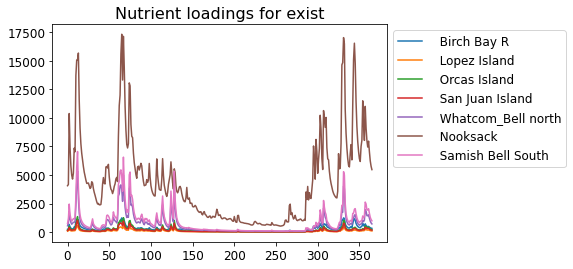

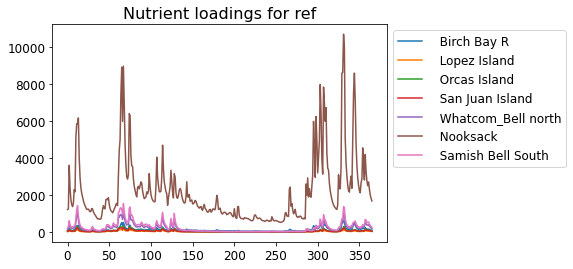

In [12]:
out_dir = "/Users/rmueller/Projects/PugetSound_NutrientSourceReduction/graphics/nutrient_loading"
river_df={}
riverNH4_df={}
riverNO3NO2_df={}
for idx,run_tag in enumerate(['exist','ref']):
    # read in data
    # spreadsheets in workbook organized by names in format of, e.g., "ssm_pnt_wq_exist"
    # I use the run tags to select the desired spreadsheet
    riverNO3NO2_df[run_tag] = pd.read_excel(
        NO3NO2_xlxs,
        sheet_name=f'ssm_pnt_wq_{run_tag}',
        usecols=river_names
    )
    riverNH4_df[run_tag] = pd.read_excel(
        NH4_xlxs,
        sheet_name=f'ssm_pnt_wq_{run_tag}',
        usecols=river_names
    )
    # combine all nitrogen loading
    river_df[run_tag]=riverNO3NO2_df[run_tag]+riverNH4_df[run_tag]
    # combine nooksack and samish bell
    river_df[run_tag]['  Nooksack']=river_df[run_tag]['  Nooksack R_1'] + river_df[run_tag]['  Nooksack R_2']
    river_df[run_tag]['  Samish Bell South']=river_df[run_tag]['  Samish_Bell south_1'] + river_df[run_tag]['  Samish_Bell south_2']
    river_df[run_tag] = river_df[run_tag].drop('  Nooksack R_1', axis=1)
    river_df[run_tag] = river_df[run_tag].drop('  Nooksack R_2', axis=1)
    river_df[run_tag] = river_df[run_tag].drop('  Samish_Bell south_1', axis=1)
    river_df[run_tag] = river_df[run_tag].drop('  Samish_Bell south_2', axis=1)
    # The column names have spaces in front of the names.  
    river_df[run_tag].plot()
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.title(f"Nutrient loadings for {run_tag}")
    plt.savefig(
        f'{out_dir}/ssm_pnt_wq_{run_tag}_rivers.png', 
        dpi=300,
        bbox_inches='tight'
    )

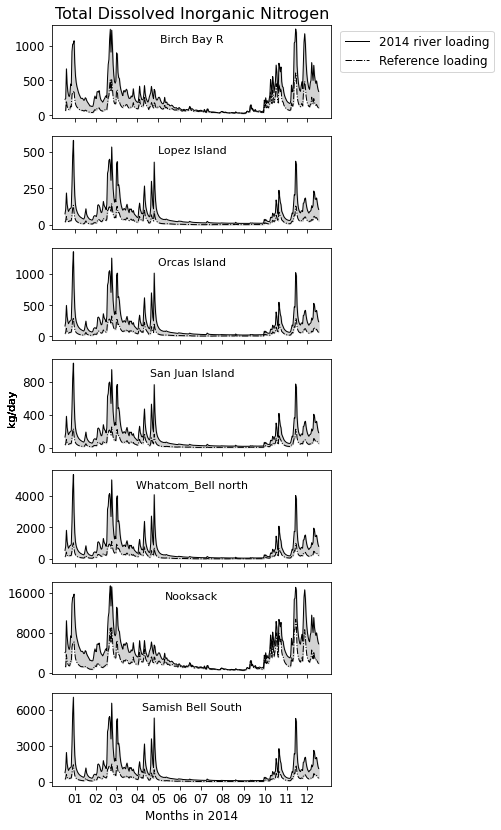

In [13]:
fig, axs = plt.subplots(7, 1,figsize = (5,2*7))
for idx,river in enumerate([*river_df['exist']]):
    existing = river_df['exist'][river][0:-1]
    reference = river_df['ref'][river][0:-1]
    x=np.arange(len(existing))
    # plot 2014 conditions
    axs[idx].plot(time[:-1],existing,
        color = ssm['bw_line']['color']['baseline'],
        lw=ssm['bw_line']['width']['baseline'],
        ls=ssm['bw_line']['style']['baseline'],
        label='2014 river loading'
    )
    # plot reference conditions
    axs[idx].plot(time[:-1], reference,
        color = ssm['bw_line']['color']['reference'],
        lw=ssm['bw_line']['width']['reference'],
        ls=ssm['bw_line']['style']['reference'],
        label='Reference loading'
    )
    # shade in region between existing and reference
    axs[idx].fill_between(time[:-1], existing, reference, color='lightgrey')
    axs[idx].yaxis.set_major_locator(MaxNLocator(3)) 
    axs[idx].xaxis.set_major_locator(MaxNLocator(14)) 
    #axs[idx].set_ylabel('kg/day')
    fig.text(0.0, 0.5, 'kg/day', va='center', rotation='vertical')
    if idx==6:
        axs[idx].set_xlabel('Months in 2014')
        axs[idx].set_xticks(ticks)
        axs[idx].set_xticklabels(ticklabels)
    else:
        axs[idx].set_xticks(ticks)
        axs[idx].set_xticklabels('')
    if idx==0:
        axs[idx].set_title('Total Dissolved Inorganic Nitrogen')
        axs[idx].legend(bbox_to_anchor=(1.01, 1.0))
    anchored_text = AnchoredText(
        river[2:], 
        loc='upper center',
        frameon=False,
        prop=dict(fontweight="normal",color="black")
    )
    axs[idx].add_artist(anchored_text)   
plt.savefig(
    f'{out_dir}/river_loadings.png', 
    dpi=300,
    bbox_inches='tight'
)
plt.show()

## Archive

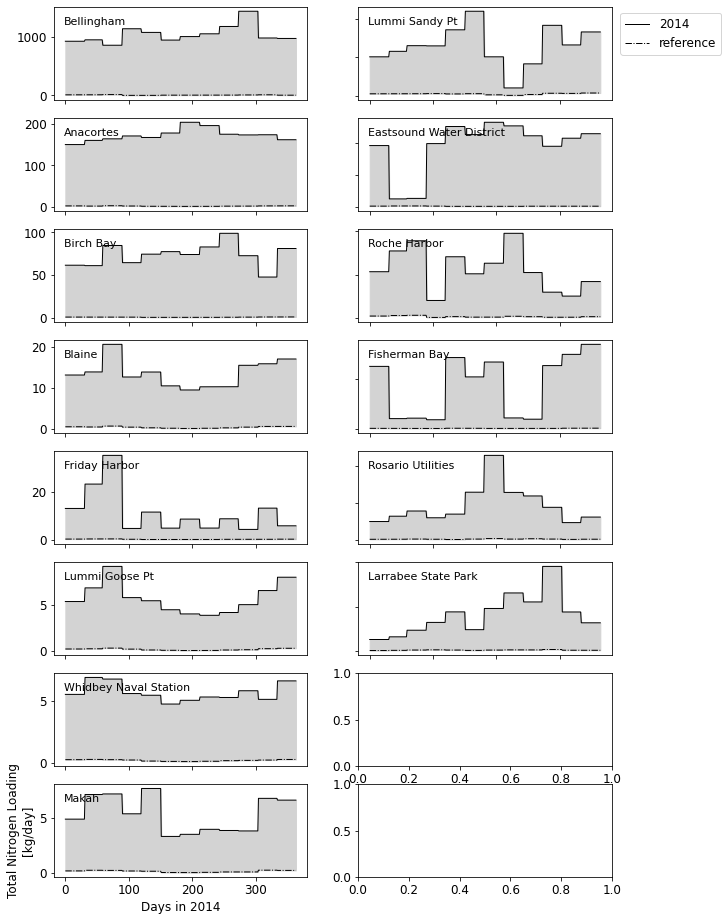

In [14]:
fig, axs = plt.subplots(8, 2,figsize = (10,2*8))
col=0
for idx,wwtp in enumerate(WWTP_names[0:8]):
    existing = wwtp_df['exist'][wwtp][0:-2]
    reference = wwtp_df['ref'][wwtp][0:-2]
    x=np.arange(len(existing))
    # plot 2014 conditions
    axs[idx,col].plot(x,existing,
        color = ssm['bw_line']['color']['baseline'],
        lw=ssm['bw_line']['width']['baseline'],
        ls=ssm['bw_line']['style']['baseline'],
        label='2014'
    )
    # plot reference conditions
    axs[idx,col].plot(x, reference,
        color = ssm['bw_line']['color']['reference'],
        lw=ssm['bw_line']['width']['reference'],
        ls=ssm['bw_line']['style']['reference'],
        label='reference'
    )
    # shade in region between existing and reference
    axs[idx,col].fill_between(x, existing, reference, color='lightgrey')
    if idx==7:
        axs[idx,col].set_xlabel('Days in 2014')
        axs[idx,col].set_ylabel('Total Nitrogen Loading\n[kg/day]')
    else:
        axs[idx,col].set_xticklabels('')
    anchored_text = AnchoredText(
        wwtp[2:], 
        loc=2,
        frameon=False
    )
    axs[idx,col].add_artist(anchored_text)   
# plot remaining WWTP in second column
col=1  
for idx,wwtp in enumerate(WWTP_names[8:-1]):
    existing = wwtp_df['exist'][wwtp][0:-1]
    reference = wwtp_df['ref'][wwtp][0:-1]
    x=np.arange(len(existing))
    # plot 2014 conditions
    axs[idx,col].plot(x,existing,
        color = ssm['bw_line']['color']['baseline'],
        lw=ssm['bw_line']['width']['baseline'],
        ls=ssm['bw_line']['style']['baseline'],
        label='2014'
    )
    # plot reference conditions
    axs[idx,col].plot(x, reference,
        color = ssm['bw_line']['color']['reference'],
        lw=ssm['bw_line']['width']['reference'],
        ls=ssm['bw_line']['style']['reference'],
        label='reference'
    )
    # shade in region between existing and reference
    axs[idx,col].fill_between(x, existing, reference, color='lightgrey')
    if idx==len(WWTP_names)-1:
        axs[idx,col].set_xlabel('Days in 2014')
    else:
        axs[idx,col].set_xticklabels('')
        axs[idx,col].set_yticklabels('')
    anchored_text = AnchoredText(
        wwtp[2:], 
        loc=2,
        frameon=False
    )
    axs[idx,col].add_artist(anchored_text)
    if idx==0:
        axs[idx,col].legend(bbox_to_anchor=(1.01, 1.0))
plt.show()

In [15]:
WWTP_names = [
  "  Bellingham",
  "  Anacortes",
  "  Birch Bay",
  "  Blaine",
  "  Friday Harbor",
  "  Lummi Goose Pt",
  "  Whidbey Naval Station",
  "  Makah",
  "  Lummi Sandy Pt",
  "  Eastsound Water District",
  "  Roche Harbor",
  "  Fisherman Bay",
  "  Rosario Utilities",
  "  Larrabee State Park",
  "  Eastsound Orcas Village",
]

In [16]:
run_description_wwtp[run_idx]

NameError: name 'run_idx' is not defined

In [ ]:
out_dir = "/Users/rmueller/Projects/PugetSound_NutrientSourceReduction/graphics/nutrient_loading"
for idx,run_tag in enumerate(run_tag_rivers):
    # read in data
    # spreadsheets in workbook organized by names in format of, e.g., "ssm_pnt_wq_exist"
    # I use the run tags to select the desired spreadsheet
    df = pd.read_excel(
        ts_xlxs,
        sheet_name=f'ssm_pnt_wq_{run_tag}',
        usecols=river_names
    )
    df['Nooksack']=df['  Nooksack R_1'] + df['  Nooksack R_2']
    df['Samish Bell North']=df['  Samish_Bell south_1'] + df['  Samish_Bell south_2']
    df = df.drop('  Nooksack R_1', axis=1)
    df = df.drop('  Nooksack R_2', axis=1)
    df = df.drop('  Samish_Bell south_1', axis=1)
    df = df.drop('  Samish_Bell south_2', axis=1)
    # The column names have spaces in front of the names.  
    df.plot()
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.title(f"Nutrient loadings for scenario {run_description_rivers[idx]}")
    plt.savefig(
        f'{out_dir}/ssm_pnt_wq_{run_tag}.png', 
        dpi=300,
        bbox_inches='tight'
    )

In [ ]:
[*df]